In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
import os
%env ALPHAVANTAGE_API_KEY = NTN3D6P6LIMZ6A2Q#alpha advantage api key

env: ALPHAVANTAGE_API_KEY=NTN3D6P6LIMZ6A2Q#alpha advantage api key


In [2]:
ptf = ['PLTR','KTOS','PDD','BABA']
ptf_df = []

In [3]:
for stock in ptf:
    ptf_df.append(web.DataReader(stock, "av-daily-adjusted", 
                                    start=datetime(2015,1, 1), 
                                    end=datetime(2021, 1, 16),api_key=os.getenv('ALPHAVANTAGE_API_KEY')))

In [4]:
for stock in ptf_df:
    stock['pct_change'] = stock['adjusted close'].pct_change()
    stock['log_ret'] = np.log(stock['adjusted close']) - np.log(stock['adjusted close'].shift(1))
    stock['rolling_ma_20'] = stock['adjusted close'].rolling(window=20).mean()

In [5]:
ptf_df[0]

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,pct_change,log_ret,rolling_ma_20
2020-09-30,10.00,11.4200,9.11,9.50,9.50,338584433,0.0,1.0,NaN,NaN,NaN
2020-10-01,9.69,10.1000,9.23,9.46,9.46,124297587,0.0,1.0,-0.004211,-0.004219,NaN
2020-10-02,9.06,9.2800,8.94,9.20,9.20,55018343,0.0,1.0,-0.027484,-0.027869,NaN
2020-10-05,9.43,9.4900,8.92,9.03,9.03,36316878,0.0,1.0,-0.018478,-0.018651,NaN
2020-10-06,9.04,10.1800,8.90,9.90,9.90,90864039,0.0,1.0,0.096346,0.091982,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,24.61,26.6000,24.31,25.93,25.93,32608983,0.0,1.0,0.028968,0.028557,25.9780
2021-01-12,26.34,26.4200,25.51,26.18,26.18,26688460,0.0,1.0,0.009641,0.009595,25.9270
2021-01-13,25.71,27.4298,25.13,25.50,25.50,51216556,0.0,1.0,-0.025974,-0.026317,25.8400
2021-01-14,25.45,25.6200,24.37,24.92,24.92,32908003,0.0,1.0,-0.022745,-0.023008,25.7645


In [6]:
returns = pd.DataFrame()
i = 0
for stock in ptf_df:
    returns[ptf[i]] = stock['close']
    i += 1

In [7]:
returns

,PLTR,KTOS,PDD,BABA
2020-09-30,9.50,19.28,74.15,293.98
2020-10-01,9.46,19.40,74.43,290.05
2020-10-02,9.20,19.62,71.40,288.17
2020-10-05,9.03,20.02,72.07,288.27
2020-10-06,9.90,19.70,72.99,292.39
...,...,...,...,...
2021-01-11,25.93,26.36,172.49,227.37
2021-01-12,26.18,28.08,169.48,225.60
2021-01-13,25.50,27.76,164.80,235.30
2021-01-14,24.92,30.40,167.26,242.98


In [8]:
corr_df = returns.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

,PLTR,KTOS,PDD,BABA
PLTR,1.000000,0.737334,0.884499,-0.804426
KTOS,0.737334,1.000000,0.772037,-0.789175
PDD,0.884499,0.772037,1.000000,-0.892916
BABA,-0.804426,-0.789175,-0.892916,1.000000


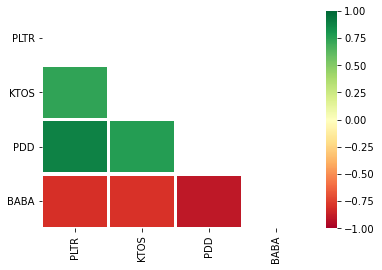

In [9]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()